In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

(100, 1)
(100,)


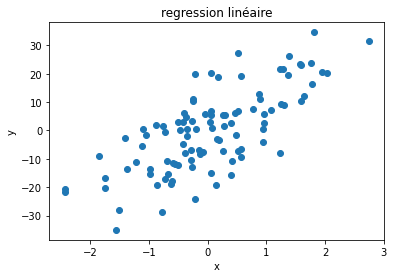

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")
print(x.shape)
print(y.shape)
# redimensionner y
y = y.reshape(y.shape[0], 1)

In [3]:
#matrice X 
X = np.hstack((x, np.ones(x.shape)))
X

array([[-0.58037733,  1.        ],
       [ 0.56225914,  1.        ],
       [-0.25045696,  1.        ],
       [ 1.75441966,  1.        ],
       [ 0.51566917,  1.        ],
       [-1.85443498,  1.        ],
       [ 1.63602767,  1.        ],
       [-1.51284053,  1.        ],
       [-1.09366499,  1.        ],
       [-0.25072776,  1.        ],
       [-0.39222951,  1.        ],
       [-0.72732699,  1.        ],
       [ 0.4889701 ,  1.        ],
       [-0.21110648,  1.        ],
       [ 0.07229718,  1.        ],
       [-0.07317569,  1.        ],
       [-0.54637666,  1.        ],
       [-0.86980472,  1.        ],
       [ 1.8180482 ,  1.        ],
       [-0.25905377,  1.        ],
       [-0.49700637,  1.        ],
       [-1.22239214,  1.        ],
       [ 1.07306766,  1.        ],
       [-0.35176112,  1.        ],
       [ 1.95281078,  1.        ],
       [ 1.5734404 ,  1.        ],
       [ 0.15795754,  1.        ],
       [ 0.87700225,  1.        ],
       [-2.42902149,

In [4]:
theta = np.random.randn(2, 1) #generer des nbr aléatoire
theta

array([[ 1.13145589],
       [-0.35693148]])

In [5]:
def model(X, theta):
    return X.dot(theta)

Text(0, 0.5, 'y')

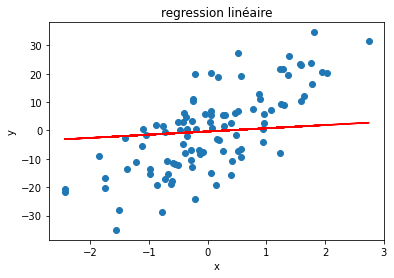

In [6]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")

In [7]:
def cost_function(X, y, theta):
    m = len(y) 
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [8]:
cost_function(X, y, theta)

91.59686095798907

In [9]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [10]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [11]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [12]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[10.36139775],
       [-0.56686252]])

Text(0, 0.5, 'y')

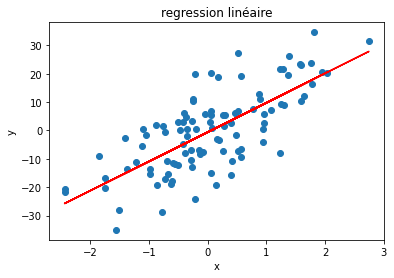

In [13]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

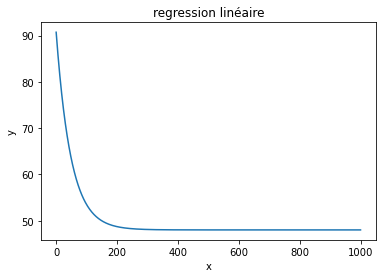

In [14]:
plt.plot(range(n_iterations), cost_history)
plt.title("regression linéaire")
plt.xlabel("x")
plt.ylabel("y")